## <b>Visualizing-the-History-of-Nobel-Prize-Winners</b>
The Nobel Prize is awarded yearly to scientists and scholars in chemistry, literature, physics, medicine, economics, and peace, with the first prize awarded in 1901. Are there any biases in the way the honors are awarded? Use your data manipulation and visualization skills to explore the history of this coveted prize.

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [9]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv("data/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

What is the most commonly awarded gender and birth country?

In [8]:
df['sex'].isnull().sum() # there is 30 null values in the gender column

30

In [33]:
df.groupby('sex')['sex'].agg('count')

sex
Female     65
Male      905
Name: sex, dtype: int64

In [34]:
top_gender = "Male"

In [38]:
top_country = df.groupby('birth_country')['birth_country'].agg('count').idxmax()
print(top_country)

United States of America


Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [55]:
df['decade'] = (df['year'] // 10)*10
df['Is_US_birth_country'] = df['birth_country'] == "United States of America"
df.groupby('decade')["Is_US_birth_country"].mean()

decade
1900    0.017544
1910    0.075000
1920    0.074074
1930    0.250000
1940    0.302326
1950    0.291667
1960    0.265823
1970    0.317308
1980    0.319588
1990    0.403846
2000    0.422764
2010    0.314050
2020    0.360000
Name: Is_US_birth_country, dtype: float64

In [58]:
max_decade_usa = df.groupby('decade')["Is_US_birth_country"].mean().idxmax()
print(max_decade_usa)

2000


In [71]:
plot_df = pd.DataFrame(df.groupby('decade')["Is_US_birth_country"].mean()).reset_index()
plot_df.columns = ["Decade","Mean_US_born"]

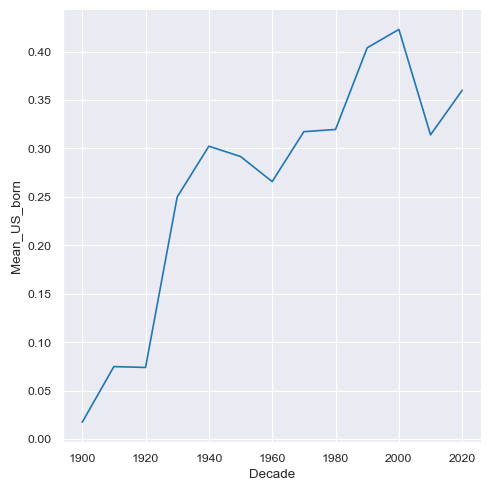

In [74]:
sns.set_style('darkgrid')
sns.set_context("paper")
sns.relplot(data=plot_df,kind='line',x="Decade",y="Mean_US_born")
plt.show()

Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [62]:
df['is_female'] = df['sex'] == "Female"
df.groupby(["decade","category"])["is_female"].mean()

decade  category  
1900    Chemistry     0.000000
        Literature    0.100000
        Medicine      0.000000
        Peace         0.071429
        Physics       0.076923
                        ...   
2020    Economics     0.111111
        Literature    0.500000
        Medicine      0.125000
        Peace         0.285714
        Physics       0.166667
Name: is_female, Length: 72, dtype: float64

In [79]:
Key_value = df.groupby(["decade","category"])["is_female"].mean().idxmax()
max_female_dict = {Key_value[0]:Key_value[1]}
print(max_female_dict)

{2020: 'Literature'}


Who was the first woman to receive a Nobel Prize, and in what category?

In [83]:
F_df = df[df['sex']=="Female"].reset_index()
first_woman_name = F_df.iloc[0,8]
print(first_woman_name)
first_woman_category = F_df.iloc[0,2]
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [95]:
More_than_one = df['full_name'].value_counts()>1
repeat_list = list(More_than_one[More_than_one].index)
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
